# Clusterring with K-means 



Focus items include:
*   Fitting the model
*   Use of KMeans `inertia_` attribute and scikit-learn's `silhouette_score` function to determine the number of cluster 



In [5]:
# IMPORT STATEMENTS

# Standard operational package imports
import numpy as np
import pandas as pd

###  Important imports for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# (To create synthetic data)
from sklearn.datasets import make_blobs

# Visualization package import
import seaborn as sns

## Create the data

In practice, you'd have a dataset of real data, and you'd read in this data and perform EDA. Here we're going to use synthetic data for demonstration.

We'll start by creating a random number generator. This is to help with the process of creating _reproducible_ synthetic data. We'll use it to create clustered data without us knowing how many clusters there are.

In [8]:
# Create random number generator
rng = np.random.default_rng(seed=42)

# Create synthetic data w/ unknown number of clusters
centers = rng.integers(low=3, high=7)
X, y = make_blobs(n_samples=1000, n_features=6, centers=centers, random_state=42)

In [9]:
# Create Pandas dataframe from the data
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,6.597330,-5.250127,-6.682249,-7.361722,-4.038499,0.804176
1,-9.754520,6.491701,1.955122,3.445692,-8.906258,10.885443
2,-0.876786,7.584145,4.199834,2.103910,-5.438354,-8.315972
3,-10.205186,7.916090,-0.682091,3.531567,-10.076584,10.031524
4,-1.967735,9.773441,4.063368,-0.617873,-7.425872,-6.488306


The data has 6 features (columns). This is too many for us to visualize in 2-D or 3-D space. We can't see how many clusters there are, so we'll need to use our detective skills to determine this.
<br />
<br />
## Model fitting with KMeans

In [10]:
# Scale the data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:2,:]

array([[ 1.26318002, -1.30518704, -1.40025528, -1.56153395,  1.10979237,
        -0.02659633],
       [-1.27068889,  0.4467899 ,  0.39416532,  0.73504761, -0.85731322,
         1.47123687]])

In [11]:
# Instantiate model with a guess cluster
kmeans3 = KMeans(n_clusters=3, random_state=42)

# Fit model to data
kmeans3.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [12]:
print('Clusters: ', kmeans3.labels_)
print('Inertia: ', kmeans3.inertia_)

Clusters:  [1 0 2 0 2 2 2 0 0 1 1 0 1 2 0 0 1 1 1 0 0 2 2 1 2 1 2 1 2 2 0 1 1 0 0 1 2
 1 1 1 0 1 0 0 1 2 0 2 0 2 1 0 1 0 0 1 0 0 2 1 2 0 0 0 1 2 2 1 1 2 0 0 2 0
 0 0 0 1 1 2 1 2 1 1 2 1 0 1 2 0 0 2 1 0 2 2 1 1 2 0 0 2 1 2 2 2 1 2 1 2 1
 0 2 2 0 0 0 2 2 0 0 1 1 1 2 0 0 1 2 1 0 1 0 1 0 1 1 0 0 1 2 0 0 1 2 2 0 0
 2 2 0 0 2 0 1 2 0 0 2 2 2 2 1 1 0 0 0 2 0 2 1 2 1 2 0 0 1 1 2 2 0 1 2 2 2
 1 2 0 1 0 1 0 1 1 1 2 2 0 1 0 2 1 0 0 2 0 0 1 0 1 2 1 2 1 2 1 2 1 0 1 2 0
 2 2 0 0 0 1 2 1 2 2 1 0 0 1 1 2 1 1 2 2 1 0 0 1 1 1 2 1 2 2 1 2 0 1 2 2 1
 1 2 1 2 2 0 1 2 1 1 2 0 1 1 0 0 1 2 1 1 2 0 1 1 1 0 1 0 2 2 2 2 2 0 1 2 0
 2 0 2 1 1 0 2 1 1 1 0 1 1 1 2 1 0 1 0 1 0 0 2 2 2 0 2 0 1 2 1 0 2 0 2 2 2
 2 0 0 0 2 1 1 1 0 0 2 2 2 0 1 1 0 2 0 1 2 0 1 0 0 2 1 2 2 1 2 0 0 0 2 1 1
 1 1 0 1 2 1 2 0 2 0 0 1 2 2 0 0 1 2 1 1 1 1 0 2 2 0 2 2 0 0 2 0 0 1 1 1 0
 1 2 2 1 1 0 0 2 0 1 0 0 2 1 1 0 0 0 2 1 1 0 1 2 2 0 1 1 0 1 2 2 1 2 2 0 2
 2 0 0 1 0 1 2 1 0 0 0 2 2 1 0 2 1 1 0 2 1 1 2 1 2 2 1 0 0 0 2 0 1 2 1 1 1
 1 0 0 1 2 2 0

## Select the number of clusters via evaluating inertia and silhouette value

### Evaluate inertia



In [13]:
# Create a list from 2-10. 
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

In [14]:
# Calculate inertia for k=2-10
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[1759.790821590543,
 306.9478846038064,
 270.6647348414035,
 239.1047825230074,
 211.08162302474136,
 201.99510486599928,
 193.258312723024,
 184.77417398695758,
 178.1820907482357]

#### Elbow plot

The "elbow" is usually the part of the curve with the sharpest angle, where the reduction in inertia that occurs when a new cluster is added begins to level off. 

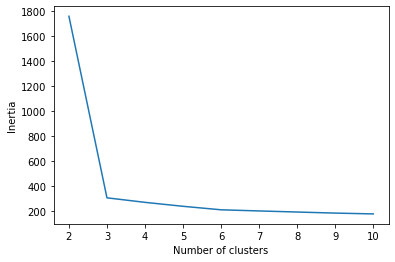

In [16]:
# Create an elbow plot
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel("Number of clusters");
plot.set_ylabel("Inertia");

### Evaluate silhouette score



In [17]:
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    
    return sil_score

In [18]:
# Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score

[0.6743221634473732,
 0.7804420928014503,
 0.6190977444013565,
 0.4264844218041325,
 0.25243430670731454,
 0.2255458652509742,
 0.19189298085889442,
 0.16710908803297336,
 0.16475897577886686]

#### Silhouette score plot
For silhouette score, greater numbers (closest to 1) are better, so we hope to see at least one clear "peak" that is close to 1.

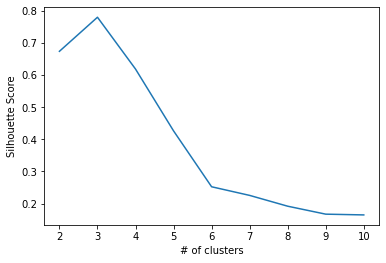

In [19]:
# Create a line plot of silhouette scores 
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

This plot indicates that the silhouette score is closest to 1 when our data is partitioned into 3 clusters. It confirms what we saw in the inertia analysis, where we noticed an elbow where _k_=3. 

## Validation
 
Since we used synthetic data for this activity, we can cheat and check to see how many clusters _actually_ existed in our data. We can do this by calling the `centers` variable, which we created with the random number generator at the beginning.

In [20]:
# Verify our findings (only possible when "correct" number of clusters exists)
centers

3

# Further analysis



In [21]:
# Fit a 3-cluster model to the data
kmeans3 = KMeans(n_clusters=3, random_state=42)
kmeans3.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [25]:
print(kmeans3.labels_[:5])
print('Unique labels:', np.unique(kmeans3.labels_))

[1 0 2 0 2]
Unique labels: [0 1 2]


Now that we have our labels, it's important to understand what they mean and decide whether this clustering makes sense for our use case.

In [26]:
# Create new column that indicates cluster assignment in original dataframe 
X['cluster'] = kmeans3.labels_
X.head()

,0,1,2,3,4,5,cluster
0,6.597330,-5.250127,-6.682249,-7.361722,-4.038499,0.804176,1
1,-9.754520,6.491701,1.955122,3.445692,-8.906258,10.885443,0
2,-0.876786,7.584145,4.199834,2.103910,-5.438354,-8.315972,2
3,-10.205186,7.916090,-0.682091,3.531567,-10.076584,10.031524,0
4,-1.967735,9.773441,4.063368,-0.617873,-7.425872,-6.488306,2


Now, we can perform analyses on the different clusters to see what makes them different from one another. The reason we'd look at cluster assignments with the unscaled data is because it's easier to relate to the unit measures. This is often a useful technique for analyzing your data, but it may also make sense to look at your cluster assignments on the scaled data, depending on your use case.  


# Predicting on new data

Take in a new data and predict a cluster assignment using our final model.



In [27]:
# Create a new observation (for demonstration)
new_observation = rng.uniform(low=-10, high=10, size=6).reshape(1, -1)
new_observation

array([[-1.2224312 ,  7.1719584 ,  3.94736058, -8.11645304,  9.51244703,
         5.22279404]])

As before, we must scale this new data the same way we did earlier. This means that we need to subtract the mean _of the training data_ and divide by the standard deviation _of the training data_. 

In [28]:
# Instantiate the scaler and fit it to the original X data
scaler = StandardScaler().fit(X.iloc[:,:-1])

# Apply the scaler to the new observation
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[ 0.05143639,  0.54828992,  0.80805446, -1.72191481,  6.58585289,
         0.62990375]])

We can use the `.predict()` method of our `kmeans5` model to predict a cluster assignment by passing to it the new observation. In this case, we only have a single observation, but it's also possible to pass an array of new data as an argument, and it would return an array of cluster predictions.

In [29]:
# Predict cluster assignment of new_observation
new_prediction = kmeans3.predict(new_observation_scaled)
new_prediction

array([1], dtype=int32)

In [31]:
# Calculate distances between new data and each centroid
distances = kmeans3.transform(new_observation_scaled)
distances

array([[8.27548544, 6.35257138, 7.16385879]])